<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- weights.csv
- Boston.csv

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [1]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

<h2 style="text-align:center; margin:40px"> Regressão Linear </h2>

<img src="img/house_prices.png"/>

A <b>regressão linear</b> é uma técnica de aprendizado supervisionado que encontra um estimador linear $y \approx f(x)$ onde $y$ é a variável resposta e $x \in \mathbb{R}^m$ ($m$ variáveis preditivas).

Se $x \in \mathbb{R}$ (uma única variável preditiva), então $f(x) = ax+b$.

Podemos re-rescrever a função como $ f_{\beta}(x) = {\beta_0} + {\beta_1}x $.

Se $x$ é dado por $m$ variáveis preditivas, então $ f_{\beta}(x) = {\beta_0} + {\beta_1}x_1 + ... + {\beta_n}x_m$.

Os termos $\beta$ são denominados coeficientes, e são encontrados pelo regressor de forma a melhor se adequar aos dados.

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como encontrar os melhores coeficientes?</h2>
<p style="margin-bottom:1cm;"></p>

<b> Método tradicional (mínimos quadrados): </b> Seja $X$ a matriz com variáveis preditivas e $y$ a variável resposta, queremos encontrar $\beta$ tal que $X\beta = y$. Se $X$ for invertível, então claramente $\beta$ = $X^{-1}y$. Quando $X$ não é invertível, podemos obter a melhor solução possível usando a pseudo-inversa de $X$: $\beta$ = $X^+y$ = $(X^TX)^{-1}X^Ty$.

<b> Método numérico (gradiente descendente): </b> Podemos definir o erro de uma predição $f_{\beta}(x_i)$ como $L(x_i, y_i) = (f_{\beta}(x_i) - y_i)^2$.

![](img/erro_reg.png)

Então podemos definir o erro total (ou custo) de um modelo como a média de cada erro individual:

$$ J(f_\beta, y) = \frac{1}{N} \sum_{i = 1}^{N} L(x_i, y_i)$$

O que queremos é minimizar $J(f_\beta, y)$ em termos de $\beta$. A solução $\beta$ encontrada será exatamente a mesma dada pelo método de mínimos quadrados.

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como minimizar?</h2>
<p style="margin-bottom:1cm;"></p>

Podemos inicializar os valores de cada $\beta_i$ aleatoriamente, e então melhorar nosso chute inicial utilizando as <b>derivadas parciais</b> de $J(f_\beta, y)$:

$$\beta_{i} := \beta_{i} - \alpha \, \frac{\partial J}{\partial \beta_{i}}$$

O parâmetro $\alpha$ é chamado de <b>taxa de aprendizado</b>, e é um parâmetro extremamente importante principalmente no treinamento de <b>redes neurais</b>

![](img/gradiente.gif)

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn).

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.19.2.


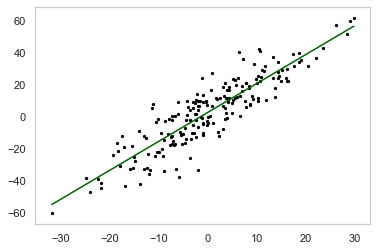

In [4]:
baseDados = baseDados = pd.read_csv('data/base_regressao_1.csv')
LR = LinearRegression()
X = baseDados[['X']]
Y = baseDados.Y
LR.fit(X,Y)

plt.plot(baseDados.X, LR.predict(baseDados[['X']]), c = 'darkgreen')
plt.scatter(baseDados.X, baseDados.Y, s = 5, c = 'black')

Vamos realizar um o primeiro exercício que consiste em uma regressão linear simples, analisando peso, altura e sexo de 200 pessoas

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

Vamos começar lendo os dados do arquivo .csv

In [8]:
pesos = pd.read_csv('data/weights.csv', sep=';')

In [9]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [10]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [11]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262F1273F98>,
      dtype=object)

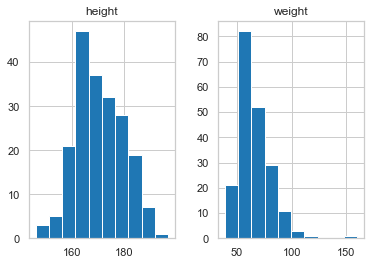

In [12]:
pesos.hist()

In [13]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [14]:
pesos.shape

(200, 3)

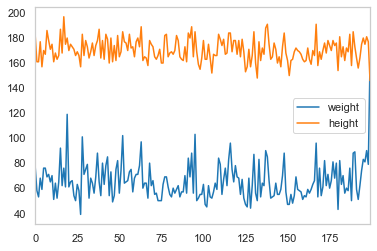

In [15]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

In [16]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Para valores discretos podemos usar o método value_counts()

In [17]:
pesos.sex.value_counts()

F    112
M     88
Name: sex, dtype: int64

Nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino

Vamos visualizar esses dados graficamente

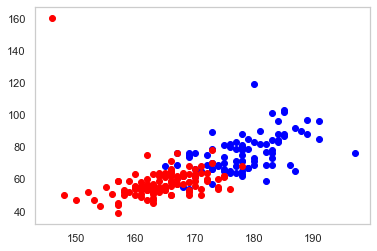

In [18]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. Exitem alguns pontos muito fora da distribuição de dados (160, 120), esses pontos são os outliers. Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. Temos que removê-los.
<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

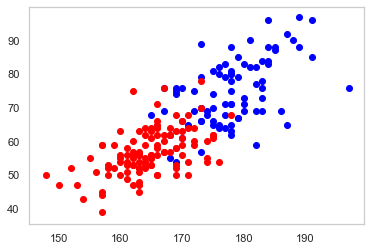

In [19]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [20]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [21]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


Anexamos as novas colunas à nossa base de dados. Axis = 1 indica que queremos anexar colunas (usar 0 para linhas)

In [22]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [23]:
X = pesos[['M', 'height']]
y = pesos.weight

In [24]:
X.head()

,M,height
0,1,182
1,0,161
2,0,161
3,1,177
4,0,157


In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Podemos visualizar os coeficientes da reta

In [26]:
lin_reg.coef_

array([7.9134644 , 0.73871471])

In [27]:
lin_reg.intercept_

-64.77641734530657

logo, nossa equação da reta é <b>peso = sexo_Masculino x 7.9165 + altura x 0.7487 - 64.7764</b>. Nesta equação já podemos observar que se a pessoa é do sexo masculino ela tende a pesar aproximadamente 7.92 quilos a mais

Vamos plotar nossa função. Observe que como temos uma variável categórica que possui dois valores, nossa reta se comporta de forma diferente para cada sexo, deslocando 7.9165 pontos para cima se for masculino. Desta forma vamos plotar uma reta para cada sexo.

In [28]:
heights = np.linspace(140, 210, 70)
sex_masc = np.ones(70)
sex_fem = np.zeros(70)

coef_sex = float(lin_reg.coef_[0])
coef_height = float(lin_reg.coef_[1])
intercept = float(lin_reg.intercept_)

reta_masc = coef_sex*sex_masc + coef_height*heights + intercept
reta_fem = coef_sex*sex_fem + coef_height*heights + intercept

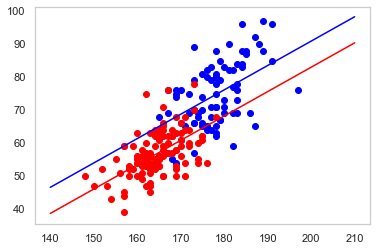

In [29]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')
plt.plot(heights, reta_masc, '-', c='blue')
plt.plot(heights, reta_fem, '-', c='red')
plt.show()

Prevendo o peso de uma mulher de 1,57 metros

In [30]:
lin_reg.predict([[0, 167]])

array([58.5889392])

Prevendo o peso de um homem de 1,73 metros

In [39]:
lin_reg.predict([[1, 173]])

array([70.93469186])

In [31]:
from sklearn.metrics import mean_squared_error

In [32]:
y_pred = lin_reg.predict(X)

In [33]:
mean_squared_error(y, y_pred)

49.26672880622366

In [34]:
a = lin_reg.predict([[0, 160]])
a

array([53.41793623])

In [35]:
b = lin_reg.predict([[1, 160]])
b

array([61.33140063])

In [36]:
c = b-a
c

array([7.9134644])

In [37]:
lin_reg.predict([[0, 60]])

array([-20.45353475])

<h4> Agora vamos analisar um exemplo mais complexo, envolvendo mais variáveis </h4>

Neste exercício vamos prever o valor mediano de uma casa na redondeza de Boston dados determinados atributos. Para isso utilizamos a base de dados 'boston.csv'

In [40]:
data = pd.read_csv('data/boston.csv', sep=';', decimal=',')

Vamos analisar as 5 primeiras linhas dos nossos dados com o método head() 

In [41]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


Nosso conjunto de dados possui 14 colunas:<br>
    <b>CRIM</b>: taxa de crimes per capta na cidade <br>
    <b>ZN</b>: proporção de terrenos residenciais zoneada para lotes acima de 25.000<br>
    <b>INDUS</b>: proporção de zonas de negócios não varejistas na cidade<br>
    <b>CHAS</b>: proximidade ao rio Carles 1 se próximo, 0 se não<br>
    <b>NOX</b>: concentração de oxido nitrico (ppm)<br>
    <b>RM</b>: número médio de cômodos por residência<br>
    <b>AGE</b>: proporção de unidades ocupadas pelo proprietário construídas antes de 1940<br>
    <b>DIS</b>: distância ponderada aos 5 centros financeiros de Boston<br>
    <b>RAD</b>: índice de acessibilidade às rodoviais <br>
    <b>TAX</b>: taxa de imposto predial de valor integral por USS 10.000 <br>
    <b>PT</b>: relação aluno-professor por cidade<br>
    <b>B</b>: 1000 (Bk − 0,63) 2 onde Bk é a proporção de negros por cidade<br>
    <b>LSTAT</b>: menor status da população <br>
    <b>MV</b>: Valor mediano de casas ocupadas pelo proprietário em USS 1000s

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe()

In [42]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


Podemos visualizar a distribuição dos dados por meio de um histograma:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000262F1508E48>,
      dtype=object)

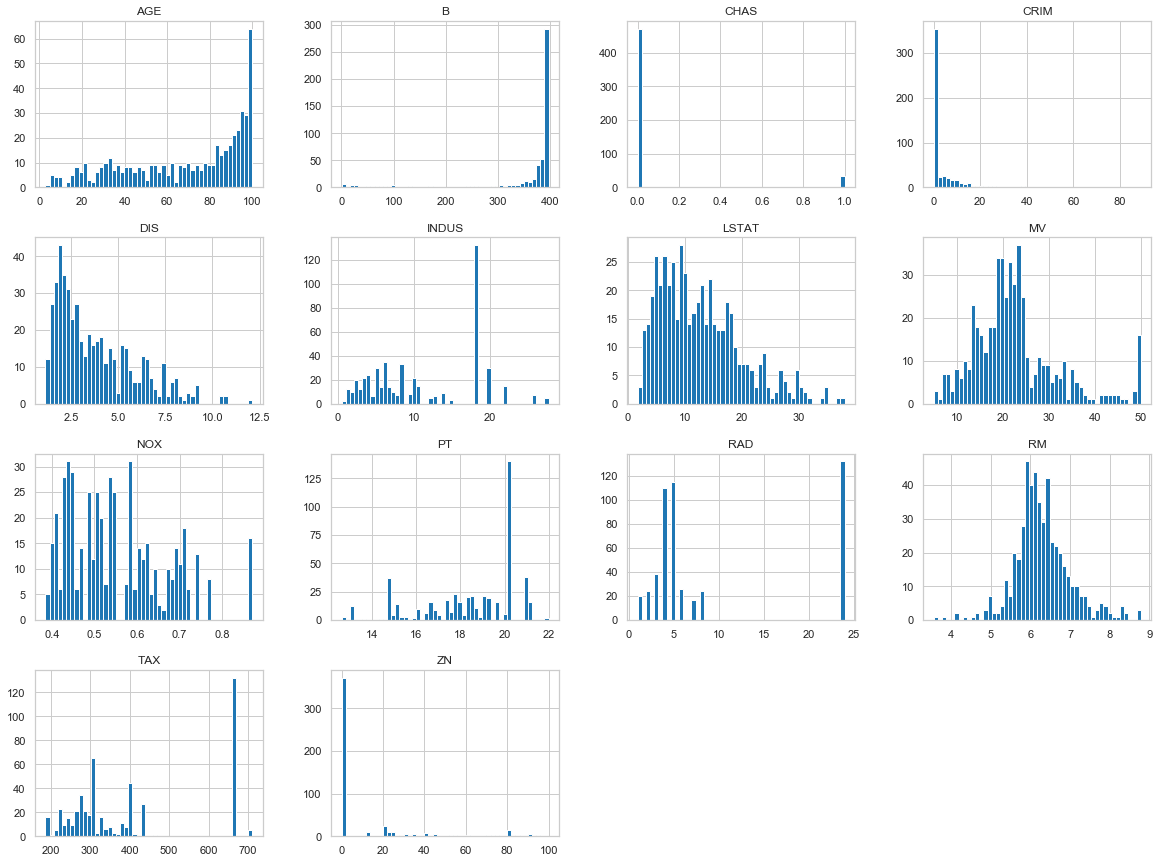

In [43]:
data.hist(bins=50, figsize=(20,15))

Agora que conhecemos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa varável dependente (y) e as variáveis independetes (X), ou atributos.

In [44]:
y = data['MV']
X = data.drop('MV', axis=1)

In [46]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Agora que temos um modelo treinado, podemos prever o valor de um novo exemplo:

In [47]:
x_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 
          78.900002, 4.9671, 2, 242, 17.799999, 396.899994, 9.14]]

In [48]:
lin_reg.predict(x_new)

array([25.02556341])

Também podemos prever uma lista de valores de uma única vez:

In [49]:
X_new = [[0.02731, 0.0, 7.07, 0, 0.469, 6.421, 78.900002, 4.9671, 2, 
          242, 17.799999, 396.899994, 9.14],
         [0.67671, 0.8, 5.56, 0, 0.567, 3.132, 60.678976, 2.3465, 3, 
          432,  9.546666, 342.435664, 3.23], 
         [0.05641, 0.0, 1.04, 1, 0.232, 4.322, 67.564646, 1.5678, 5, 
          567, 15.898006, 224.655678, 5.84]]

In [50]:
lin_reg.predict(X_new)

array([25.02556341, 22.96398145, 27.65635662])

Também é possível visualizarmos os coeficientes da reta para cada atributo

In [51]:
lin_reg.coef_

array([-1.08011353e-01,  4.64204559e-02,  2.05586761e-02,  2.68673389e+00,
       -1.77666149e+01,  3.80986498e+00,  6.92223926e-04, -1.47556679e+00,
        3.06049515e-01, -1.23345932e-02, -9.52747256e-01,  9.31168341e-03,
       -5.24758397e-01])

e o valor do bias:

In [52]:
lin_reg.intercept_

36.45949145783369

Também podemos calcular o erro médio quadrado (MSE) do nosso modelo durante o treinamento

In [53]:
mean_squared_error(lin_reg.predict(X), y)

21.894831188831233

E seu eu quiser, ao invés de prever o peso, prever o sexo?

In [54]:
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


In [55]:
#antes
#X = pesos[['M', 'height']]
#y = pesos.weight
#Agora
X1 = pesos[['height', 'weight']]
y1 = pesos.M
#y1 = pesos.sex

In [56]:
lin_reg1 = LinearRegression()
lin_reg1.fit(X1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lin_reg1.predict([[173, 80]])

array([0.74302842])

In [58]:
y_pred1 = lin_reg1.predict(X1)

In [59]:
mean_squared_error(y1, y_pred1)

0.09921070377288263

In [60]:
from sklearn.linear_model import LogisticRegression
reg_log = LogisticRegression(C=1)
reg_log.fit(X1, y1)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
reg_log.predict([[173, 80]])

array([1], dtype=uint8)

In [62]:
y_pred2 = reg_log.predict(X1)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y1, y_pred2)

0.8

In [65]:
accuracy_score(y1, y_pred2, normalize=False)

156

In [66]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(criterion="entropy", max_depth=2)
arvore.fit(X1, y1)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [67]:
arvore.predict([[173, 80]])

array([1], dtype=uint8)

In [68]:
y_pred3 = arvore.predict(X1)

In [69]:
accuracy_score(y1, y_pred3)

0.9076923076923077

In [70]:
accuracy_score(y1, y_pred3, normalize=False)

177

In [71]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y1, y_pred3)
confusion_matrix

array([[99, 12],
       [ 6, 78]], dtype=int64)

In [73]:
from sklearn.metrics import classification_report
print(classification_report(y1, y_pred3))

             precision    recall  f1-score   support

          0       0.94      0.89      0.92       111
          1       0.87      0.93      0.90        84

avg / total       0.91      0.91      0.91       195

